In [1]:
# run if ModuleNotFoundError occurs, then use the path output to install modules
import sys
print(sys.executable) 

/usr/local/Cellar/ipython/8.0.1/libexec/bin/python3.10


### Functions for Data Loading and Plotting

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import json
import math, random
import scipy.optimize
import scipy.stats as stats
import seaborn as sns
import re

sns.set(font_scale=1.2, style="whitegrid")
plt.rcParams['figure.figsize'] = [4.0, 4.0]

def load_benchmark(filename, norm=0, n_filter=None):
    data = []
    with open(filename, "r") as f:
        for line in f:
            words = line.split(" ")
            if len(words) < 5:
                continue
            algo = words[0]
            if algo == "AliasTable":
                algo = "Alias Table"
            elif algo == "WeightedIndex":
                algo = "Weighted Index"
            elif algo == "BinaryTree":
                algo = "Binary Tree"
            elif algo == "LogCascade":
                algo = "Log Cascade"
            elif algo == "LogCascade1L":
                algo = "1-Layer Log Cascade"
            elif algo == "LogCascade2L":
                algo = "2-Layer Log Cascade"
            elif algo == "LogCascade3L":
                algo = "3-Layer Log Cascade"
            elif algo == "LogCascade4L":
                algo = "4-Layer Log Cascade"
            elif algo == "ProposalArray":
                algo = "Proposal Array"
            elif algo == "ProposalArrayStar":
                algo = "Proposal Array$*$"
            else:
                continue
            dist = words[1]
            if dist == "NoisyUniform":
                dist = "Noisy"
            elif dist == "PowerLaw":
                dist = "Skewed"
            elif dist == "NoisyDelta":
                dist = "Delta"
            n = int(words[3].replace("]", ""))
            if n_filter and n not in n_filter:
                continue
            s = float(words[6].replace("ms\n", "")) / 1000
            if norm > 0:
                s /= norm
            data.append([algo, dist, n, s])
    data = pd.DataFrame(data, columns=["Algo", "Dist", "n", "s"])
    return data

### Sequential

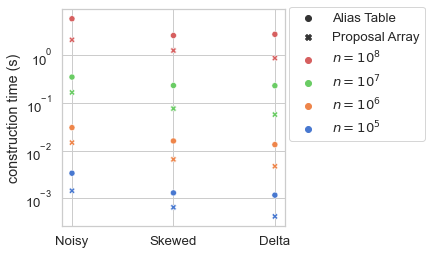

In [54]:
data = load_benchmark("results/construction")

plt.rcParams['figure.figsize'] = [4.0, 4.0]
fig, ax = plt.subplots()
g_results=sns.scatterplot(x="Dist", y="s", data=data, hue="n", style="Algo", palette="muted")
g_results.set(xlabel='', ylabel='construction time (s)')
g_results.set(yscale='log')
handles, labels = ax.get_legend_handles_labels()
handles = [handles[6], handles[7], handles[4], handles[3], handles[2], handles[1]]
labels = ["Alias Table", "Proposal Array", "$n = 10^8$", "$n = 10^7$", "$n = 10^6$", "$n = 10^5$"]
ax.legend(handles=handles[0:], labels=labels[0:], bbox_to_anchor=(1.02, 1.01), loc=2, borderaxespad=0., ncol=1)
g_results.get_figure().savefig("figures/construction.pdf", format='pdf', dpi=1200, bbox_inches="tight")

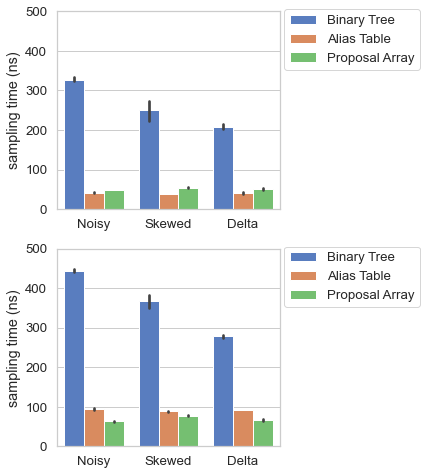

In [55]:
data = load_benchmark("results/sampling", 1 / 1000)
data_7 = data[data["n"] == 10000000]
data_8 = data[data["n"] == 100000000]

plt.rcParams['figure.figsize'] = [4.0, 8.0]
fig, ax = plt.subplots(2, 1)
g_results=sns.barplot(x="Dist", y="s", data=data_7, hue="Algo", palette="muted", ax=ax[0])
g_results.set(xlabel='', ylabel='sampling time (ns)', yticks=[0, 100, 200, 300, 400, 500])
g_results=sns.barplot(x="Dist", y="s", data=data_8, hue="Algo", palette="muted", ax=ax[1])
g_results.set(xlabel='', ylabel='sampling time (ns)', yticks=[0, 100, 200, 300, 400, 500])
handles, labels = ax[0].get_legend_handles_labels()
handles = [handles[0], handles[1], handles[2]]
labels = ["Binary Tree", "Alias Table", "Proposal Array"]
ax[0].legend(handles=handles[0:], labels=labels[0:], bbox_to_anchor=(1.02, 1.01), loc=2, borderaxespad=0., ncol=1)
handles, labels = ax[1].get_legend_handles_labels()
handles = [handles[0], handles[1], handles[2]]
labels = ["Binary Tree", "Alias Table", "Proposal Array"]
ax[1].legend(handles=handles[0:], labels=labels[0:], bbox_to_anchor=(1.02, 1.01), loc=2, borderaxespad=0., ncol=1)
#ax[1].get_legend().remove()
g_results.get_figure().savefig("figures/sampling.pdf", format='pdf', dpi=1200, bbox_inches="tight")

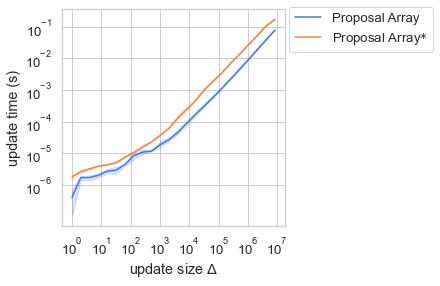

In [4]:
data = load_benchmark("results/increasing")

plt.rcParams['figure.figsize'] = [4.0, 4.0]
fig, ax = plt.subplots()
g_results=sns.lineplot(x="n", y="s", data=data, hue="Algo", palette="muted")
g_results.set(xlabel='update size $\Delta$', ylabel='update time (s)')
g_results.set(xscale='log', yscale='log', xticks=[1, 10, 100, 1000, 10000, 100000, 1000000, 10000000], yticks=[0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], bbox_to_anchor=(1.02, 1.01), loc=2, borderaxespad=0., ncol=1)
g_results.get_figure().savefig("figures/increasing.pdf", format='pdf', dpi=1200, bbox_inches="tight")

0.0025651938999999998
0.0020435605


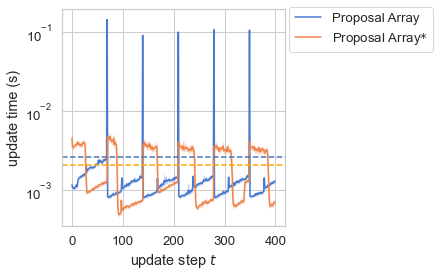

In [38]:
data = load_benchmark("results/constant")

print(data[data["Algo"] == "Proposal Array"].s.mean())
print(data[data["Algo"] == "Proposal Array$*$"].s.mean())

plt.rcParams['figure.figsize'] = [4.0, 4.0]
fig, ax = plt.subplots()
g_results=sns.lineplot(x="n", y="s", data=data, hue="Algo", palette="muted")
g_results.set(xlabel='update step $t$', ylabel='update time (s)')
g_results.set(xscale='linear', yscale='log')
handles, labels = ax.get_legend_handles_labels()
ax.axhline(data[data["Algo"] == "Proposal Array"].s.mean(), color="b", ls='--')
ax.axhline(data[data["Algo"] == "Proposal Array$*$"].s.mean(), color="orange", ls='--')
ax.legend(handles=handles[0:], labels=labels[0:], bbox_to_anchor=(1.02, 1.01), loc=2, borderaxespad=0., ncol=1)
g_results.get_figure().savefig("figures/constant.pdf", format='pdf', dpi=1200, bbox_inches="tight")

RandomIncrease
38.900369
48.760042
116.54513800000001
193.443
273.40741099999997

PolyaUrn
39.786306999999994
57.79867999999999
138.00739899999996
211.005
277.824143

SingleIncrease
38.40486
59.074019
104.683291
25.67
54.594491



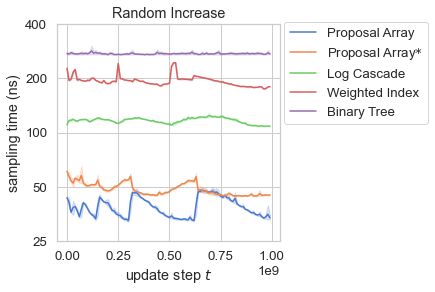

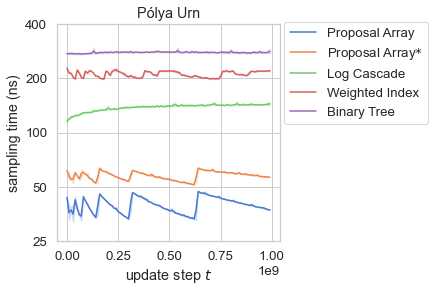

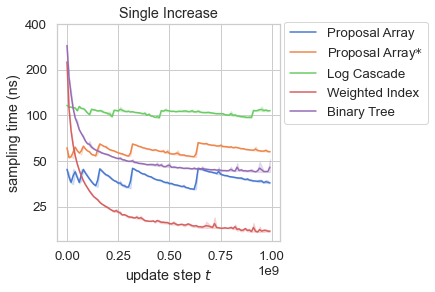

In [5]:
data = load_benchmark("results/dynamic_sampling_all", 1 / 1000)

for dist in ["RandomIncrease", "PolyaUrn", "SingleIncrease"]:
    dd = data[data["Dist"] == dist]
    print(dist)
    print(dd[dd["Algo"] == "Proposal Array"].s.mean())
    print(dd[dd["Algo"] == "Proposal Array$*$"].s.mean())
    print(dd[dd["Algo"] == "Log Cascade"].s.mean())
    print(dd[dd["Algo"] == "Weighted Index"].s.mean())
    print(dd[dd["Algo"] == "Binary Tree"].s.mean())
    print()

hue_order = ["Proposal Array", "Proposal Array$*$", "Log Cascade", "Weighted Index", "Binary Tree"]

data_ri = data[data["Dist"] == "RandomIncrease"]
fig, ax = plt.subplots()
g_results=sns.lineplot(x="n", y="s", data=data_ri, hue="Algo", hue_order=hue_order, palette="muted")
g_results.set(xlabel='update step $t$', ylabel='sampling time (ns)')
g_results.set(xscale='linear', yscale='log', title='Random Increase')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], bbox_to_anchor=(1.02, 1.01), loc=2, borderaxespad=0., ncol=1)
ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
ax.set_yticks([25, 50, 100, 200, 400])
g_results.get_figure().savefig("figures/random_increase.pdf", format='pdf', dpi=1200, bbox_inches="tight")

data_pu = data[data["Dist"] == "PolyaUrn"]
fig, ax = plt.subplots()
g_results=sns.lineplot(x="n", y="s", data=data_pu, hue="Algo", hue_order=hue_order, palette="muted")
g_results.set(xlabel='update step $t$', ylabel='sampling time (ns)')
g_results.set(xscale='linear', yscale='log', title='Pólya Urn')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], bbox_to_anchor=(1.02, 1.01), loc=2, borderaxespad=0., ncol=1)
ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
ax.set_yticks([25, 50, 100, 200, 400])
g_results.get_figure().savefig("figures/polya_urn.pdf", format='pdf', dpi=1200, bbox_inches="tight")

data_si = data[data["Dist"] == "SingleIncrease"]
fig, ax = plt.subplots()
g_results=sns.lineplot(x="n", y="s", data=data_si, hue="Algo", hue_order=hue_order, palette="muted")
g_results.set(xlabel='update step $t$', ylabel='sampling time (ns)')
g_results.set(xscale='linear', yscale='log', title='Single Increase')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], bbox_to_anchor=(1.02, 1.01), loc=2, borderaxespad=0., ncol=1)
ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
ax.set_yticks([25, 50, 100, 200, 400])
g_results.get_figure().savefig("figures/single_increase.pdf", format='pdf', dpi=1200, bbox_inches="tight")

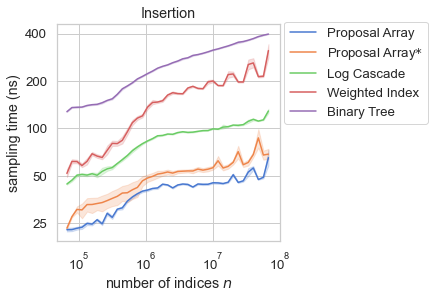

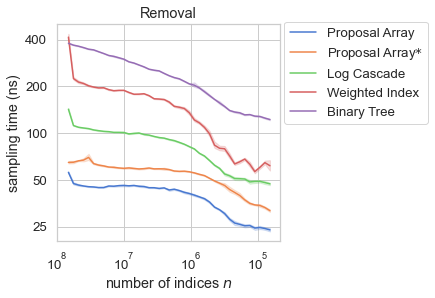

In [5]:
data = load_benchmark("results/insertion_removal_all", 1 / 1000)

hue_order = ["Proposal Array", "Proposal Array$*$", "Log Cascade", "Weighted Index", "Binary Tree"]

fig, ax = plt.subplots()
g_results=sns.lineplot(x="n", y="s", data=data[data["Dist"] == "Insert"], hue="Algo", hue_order=hue_order, palette="muted")
g_results.set(xlabel='number of indices $n$', ylabel='sampling time (ns)')
g_results.set(xscale='log', yscale='log', title='Insertion')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], bbox_to_anchor=(1.02, 1.01), loc=2, borderaxespad=0., ncol=1)
ax.set_xticks([10 ** 5, 10 ** 6, 10 ** 7, 10 ** 8])
ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
ax.set_yticks([25, 50, 100, 200, 400])
ax.set_yticklabels(["25", "50", "100", "200", "400"])
g_results.get_figure().savefig("figures/insertion.pdf", format='pdf', dpi=1200, bbox_inches="tight")

fig, ax = plt.subplots()
g_results=sns.lineplot(x="n", y="s", data=data[data["Dist"] == "Erase"], hue="Algo", hue_order=hue_order, palette="muted")
g_results.set(xlabel='number of indices $n$', ylabel='sampling time (ns)')
g_results.set(xscale='log', yscale='log', title='Removal')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], bbox_to_anchor=(1.02, 1.01), loc=2, borderaxespad=0., ncol=1)
ax.set_xticks([10 ** 5, 10 ** 6, 10 ** 7, 10 ** 8])
ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
ax.set_yticks([25, 50, 100, 200, 400])
ax.set_yticklabels(["25", "50", "100", "200", "400"])
ax.invert_xaxis()
g_results.get_figure().savefig("figures/removal.pdf", format='pdf', dpi=1200, bbox_inches="tight")

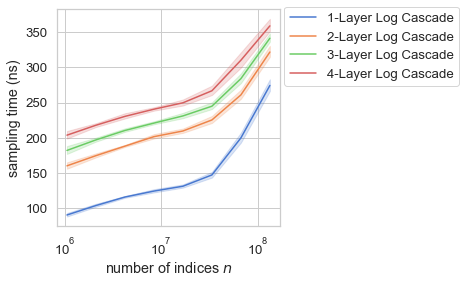

In [8]:
data = load_benchmark("results/lc_layers", 1 / 1000)

plt.rcParams['figure.figsize'] = [4.0, 4.0]
fig, ax = plt.subplots()
g_results=sns.lineplot(x="n", y="s", data=data, hue="Algo", palette="muted")
g_results.set(xlabel='number of indices $n$', ylabel='sampling time (ns)')
g_results.set(xscale='log', yscale='linear')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], bbox_to_anchor=(1.02, 1.01), loc=2, borderaxespad=0., ncol=1)
g_results.get_figure().savefig("figures/lc_layers.pdf", format='pdf', dpi=1200, bbox_inches="tight")